In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

## Cluster Summary

In [2]:
cell_tidy_data = pd.read_msgpack('/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg')


/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'MajorRegion', 'SubRegion', 'CellClass', 'l1-umap_0', 'l1-umap_1',
       'l1-tsne_0', 'l1-tsne_1', 'MajorType', 'l2-umap_0', 'l2-umap_1',
       'l2-tsne_0', 'l2-tsne_1', 'SubType', 'l3-umap_0', 'l3-umap_1',
       'l3-tsne_0', 'l3-tsne_1', 'L1CellClass'],
      dtype='object')

In [4]:
cell_tidy_data.head()

,AllcPath,CCC_Rate,CG_Rate,CG_RateAdj,CH_Rate,CH_RateAdj,FinalReads,InputReads,MappedReads,Region,...,l2-umap_0,l2-umap_1,l2-tsne_0,l2-tsne_1,SubType,l3-umap_0,l3-umap_1,l3-tsne_0,l3-tsne_1,L1CellClass
10E_M_0,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.008198,0.822633,0.821166,0.041640,0.033718,1626504.0,4407752,2892347.0,10E,...,-23.368460,-1.151200,-34.021153,-19.429447,MGE-Sst Rxra,-0.766630,-16.704815,20.297781,1.192093,Inh
10E_M_1,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006019,0.743035,0.741479,0.024127,0.018218,2009998.0,5524084,3657352.0,10E,...,-8.322600,-3.988057,19.205085,10.272570,CA3 Cadm2,4.290240,-2.610511,7.860870,8.813396,Exc-HPF
10E_M_10,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006569,0.750172,0.748520,0.027665,0.021235,1383636.0,3455260,2172987.0,10E,...,-7.409779,-4.662556,20.146606,6.345836,CA3 Cadm2,5.852028,-2.510058,12.927795,8.544050,Exc-HPF
10E_M_101,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006353,0.760898,0.759369,0.026547,0.020323,2474670.0,7245482,4778768.0,10E,...,-6.266342,-8.345406,25.465765,-6.767192,CA3 Cadm2,11.189178,-3.763147,29.875836,2.739283,Exc-HPF
10E_M_102,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.005409,0.752980,0.751637,0.019497,0.014164,2430290.0,7004754,4609570.0,10E,...,-1.135772,-17.311239,-7.427455,-20.497435,CA1 Chrm3,2.912797,2.683262,-19.971042,24.551260,Exc-HPF


## Palette

In [5]:

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

In [6]:
cell_tidy_data['MajorType'].value_counts()

IT-L23       11919
OLF-Exc       9681
CT-L6         8716
IT-L5         6640
DG            6179
IT-L6         4947
PAL-Inh       4481
IT-L4         4347
CA1           4075
MSN-D2        3340
MSN-D1        3139
ODC           3082
MGE-Sst       2931
PT-L5         2638
MGE-Pvalb     2636
CA3           2423
ASC           2215
LSX-Inh       2143
Foxp2         1964
D1L-Fstl4     1962
NP-L6         1819
CGE-Vip       1746
OLF           1452
CGE-Lamp5     1449
L6b           1069
CLA            945
MGC            853
OPC            777
IG-CA2         745
EP             666
D1L-PAL        495
VLMC           419
CA3-St18       408
Chd7           386
ANP            331
VLMC-Pia       225
Unc5c          219
PC             170
DG-po          145
Gfra1          110
EC              95
Name: MajorType, dtype: int64

In [7]:
cell_tidy_data = cell_tidy_data[cell_tidy_data['MajorType'] == 'MSN-D1']

## UMAP color by brain dissection region, label by major types

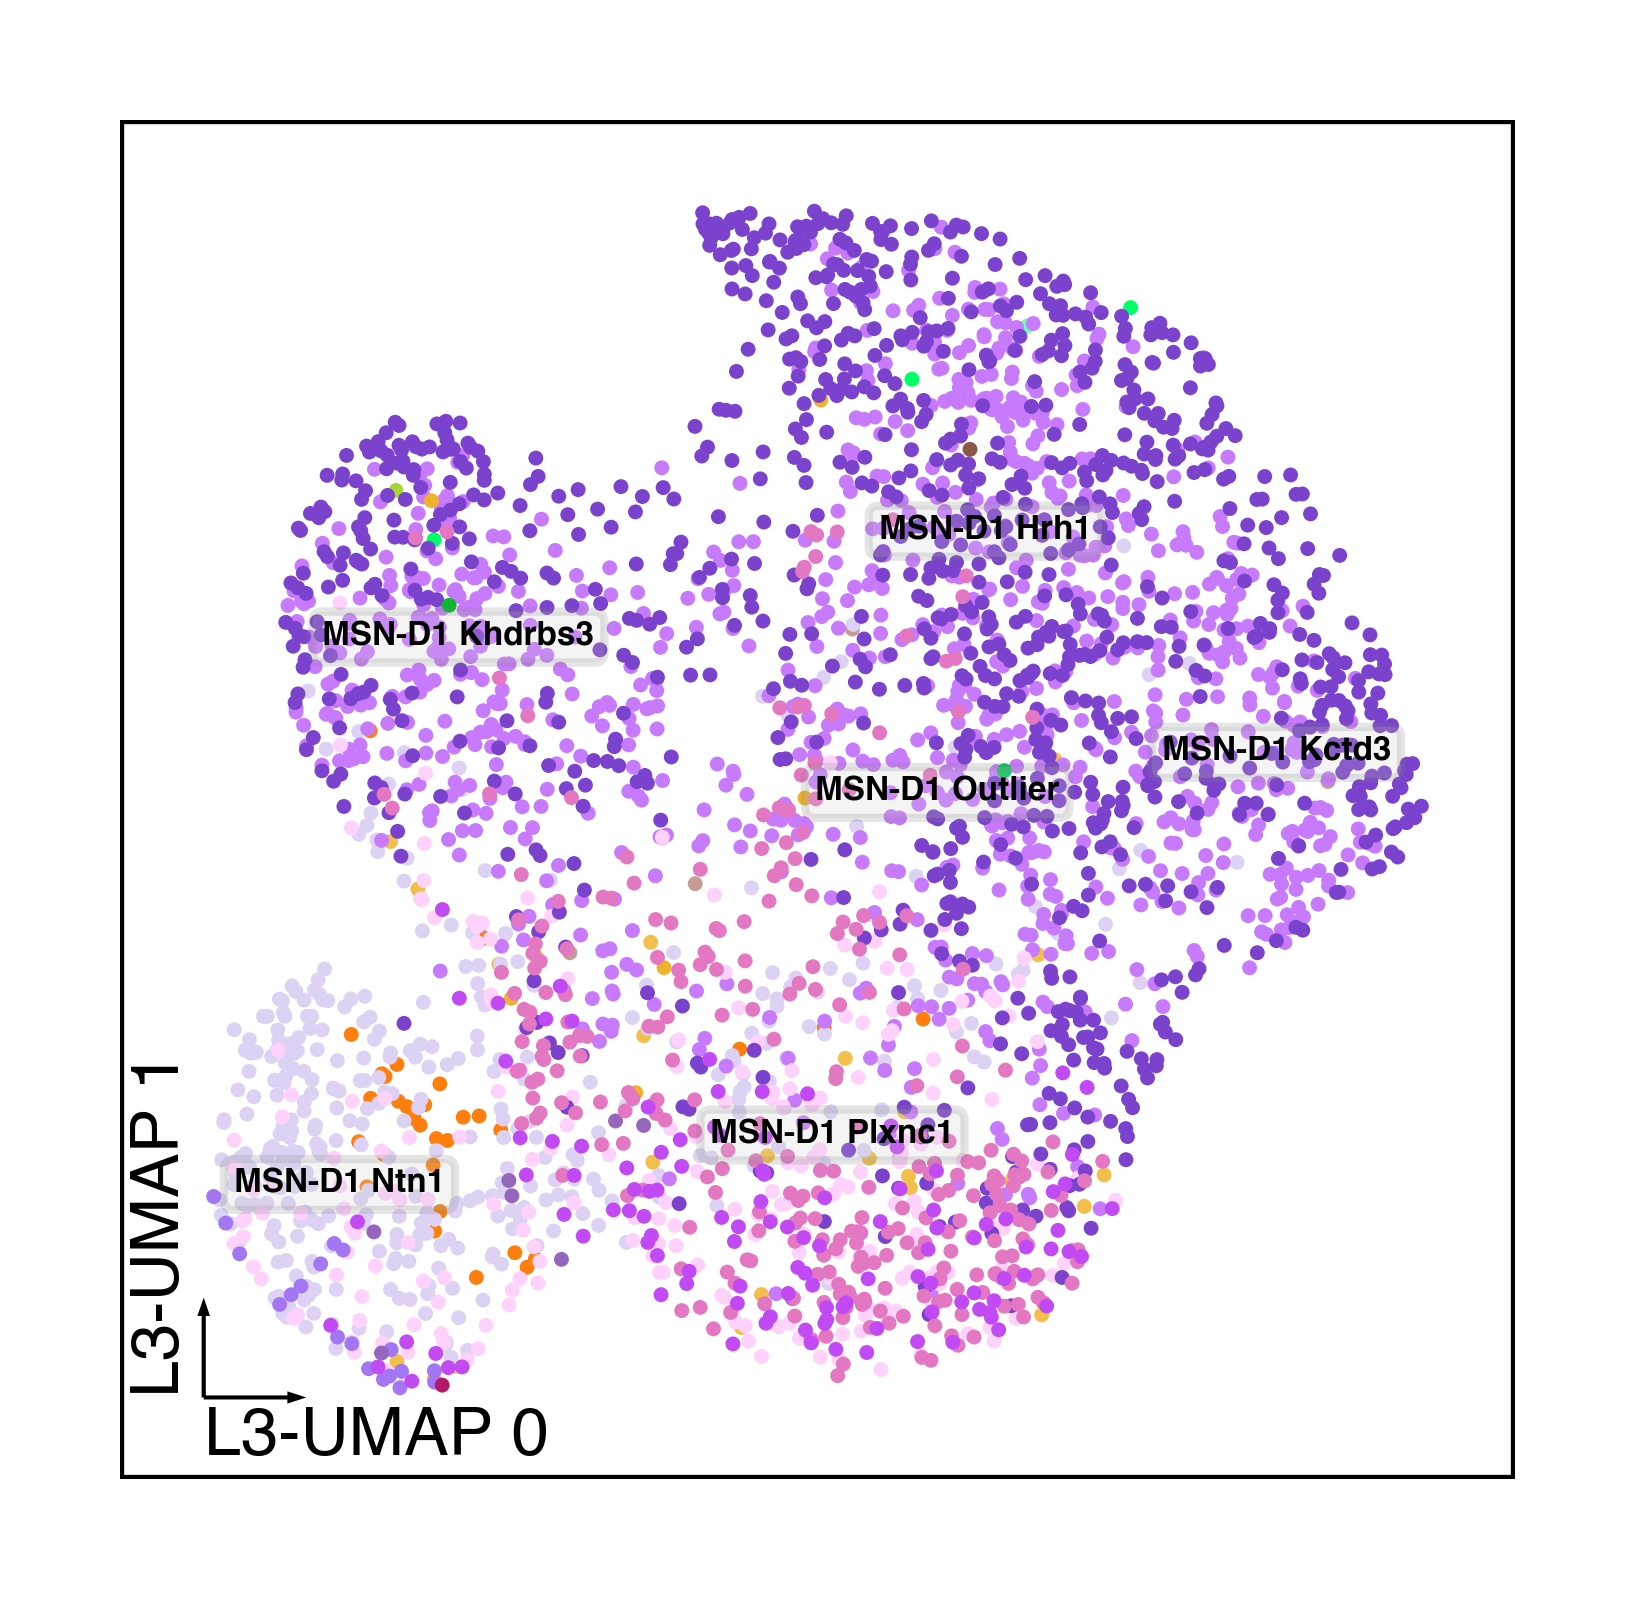

In [8]:
fig, ax = plt.subplots(figsize=(1.5, 1.5), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l3-umap',
                    hue='Region',
                    palette=region_palette,
                    s=0.8,
                    max_points=None,
                    text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
pass

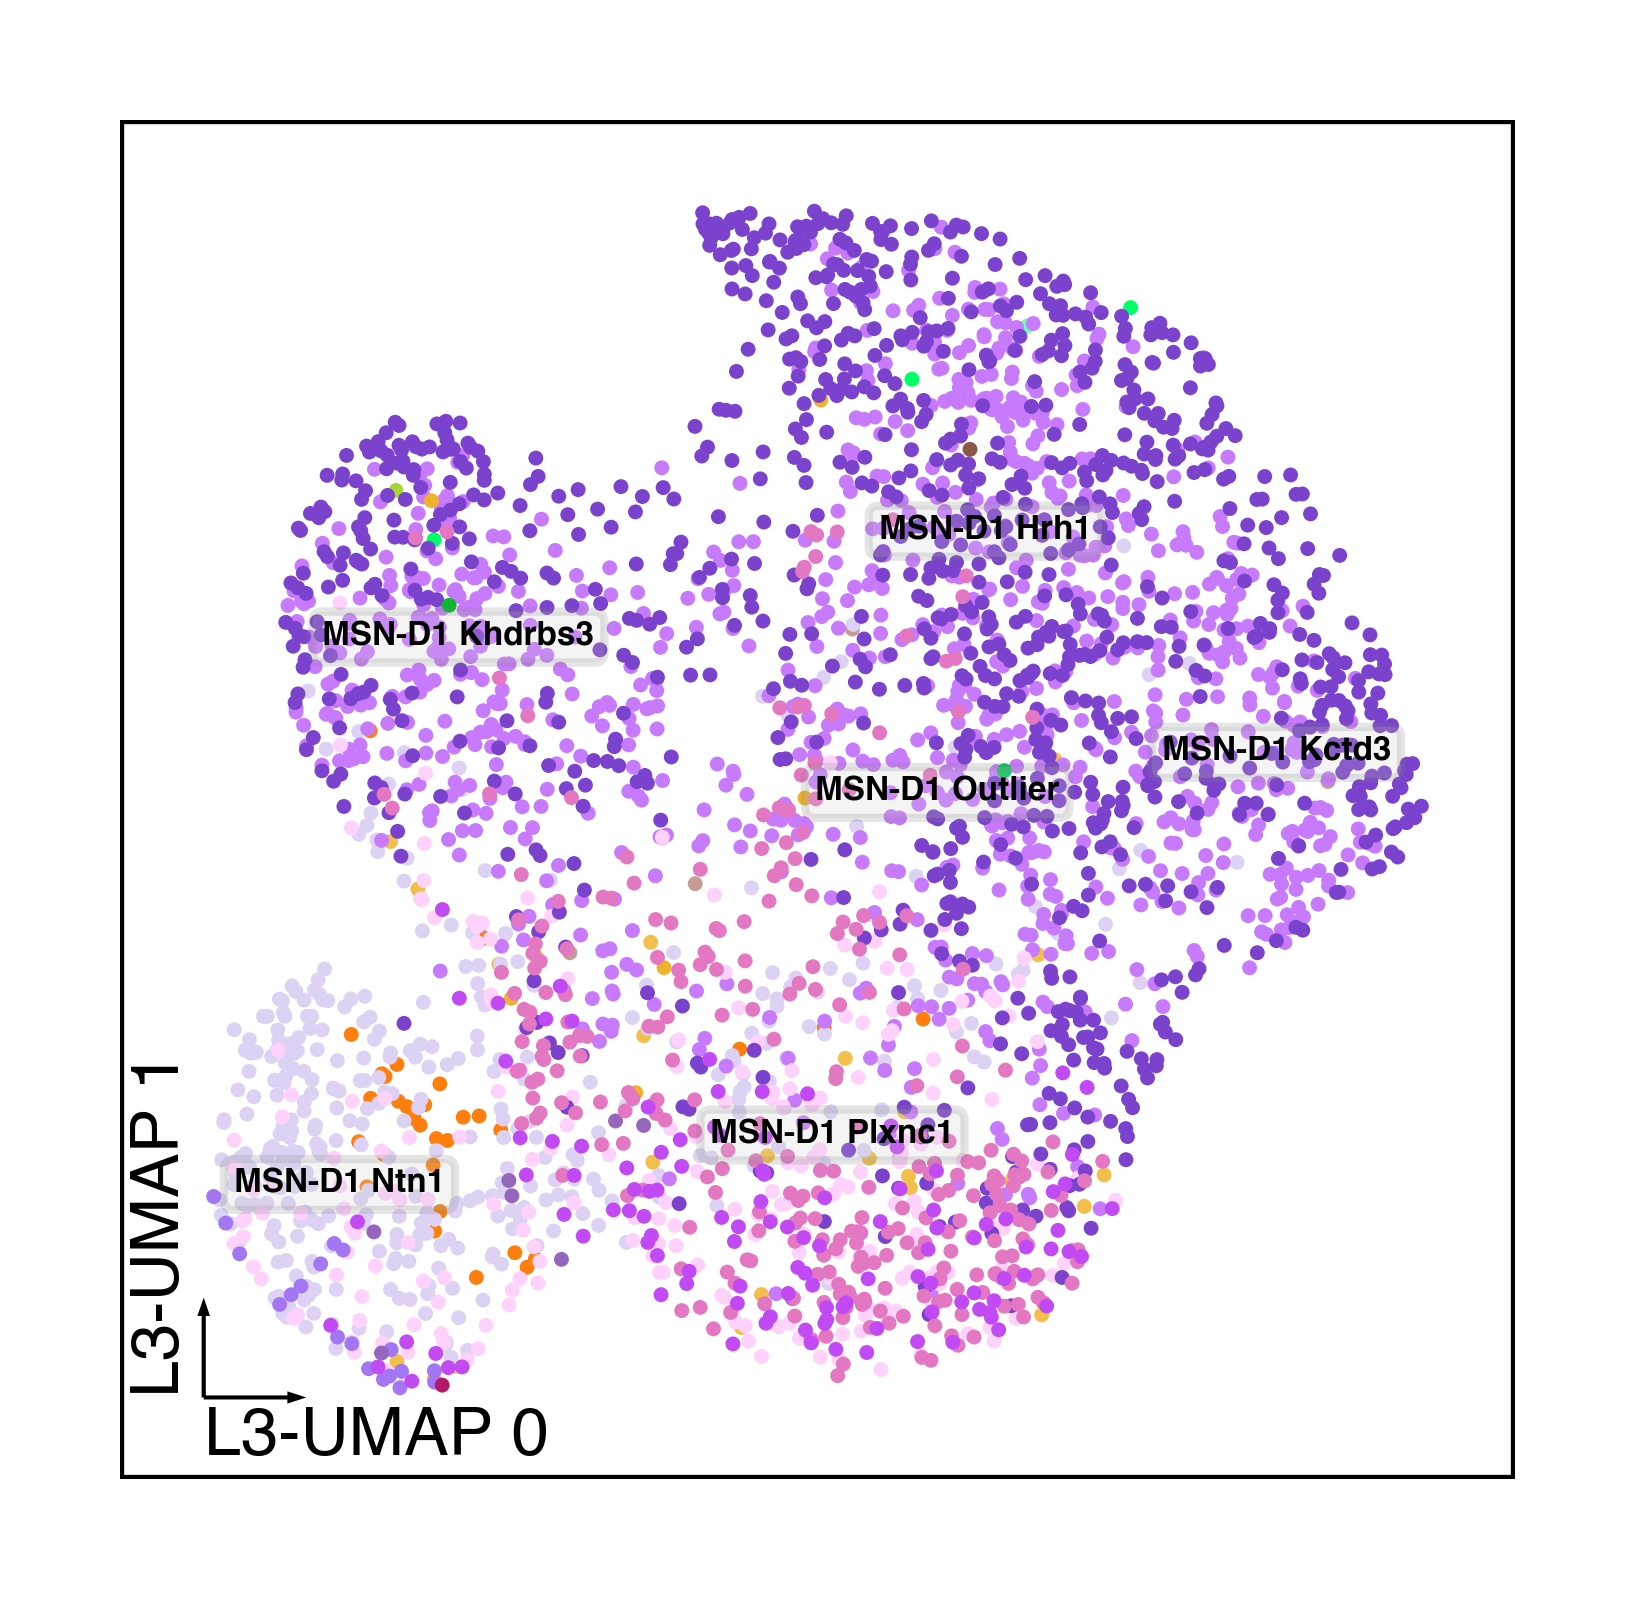

In [9]:
fig, ax = plt.subplots(figsize=(1.5, 1.5), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l3-umap',
                    hue='Region',
                    palette=region_palette,
                    s=0.8,
                    max_points=None,
                    text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
pass

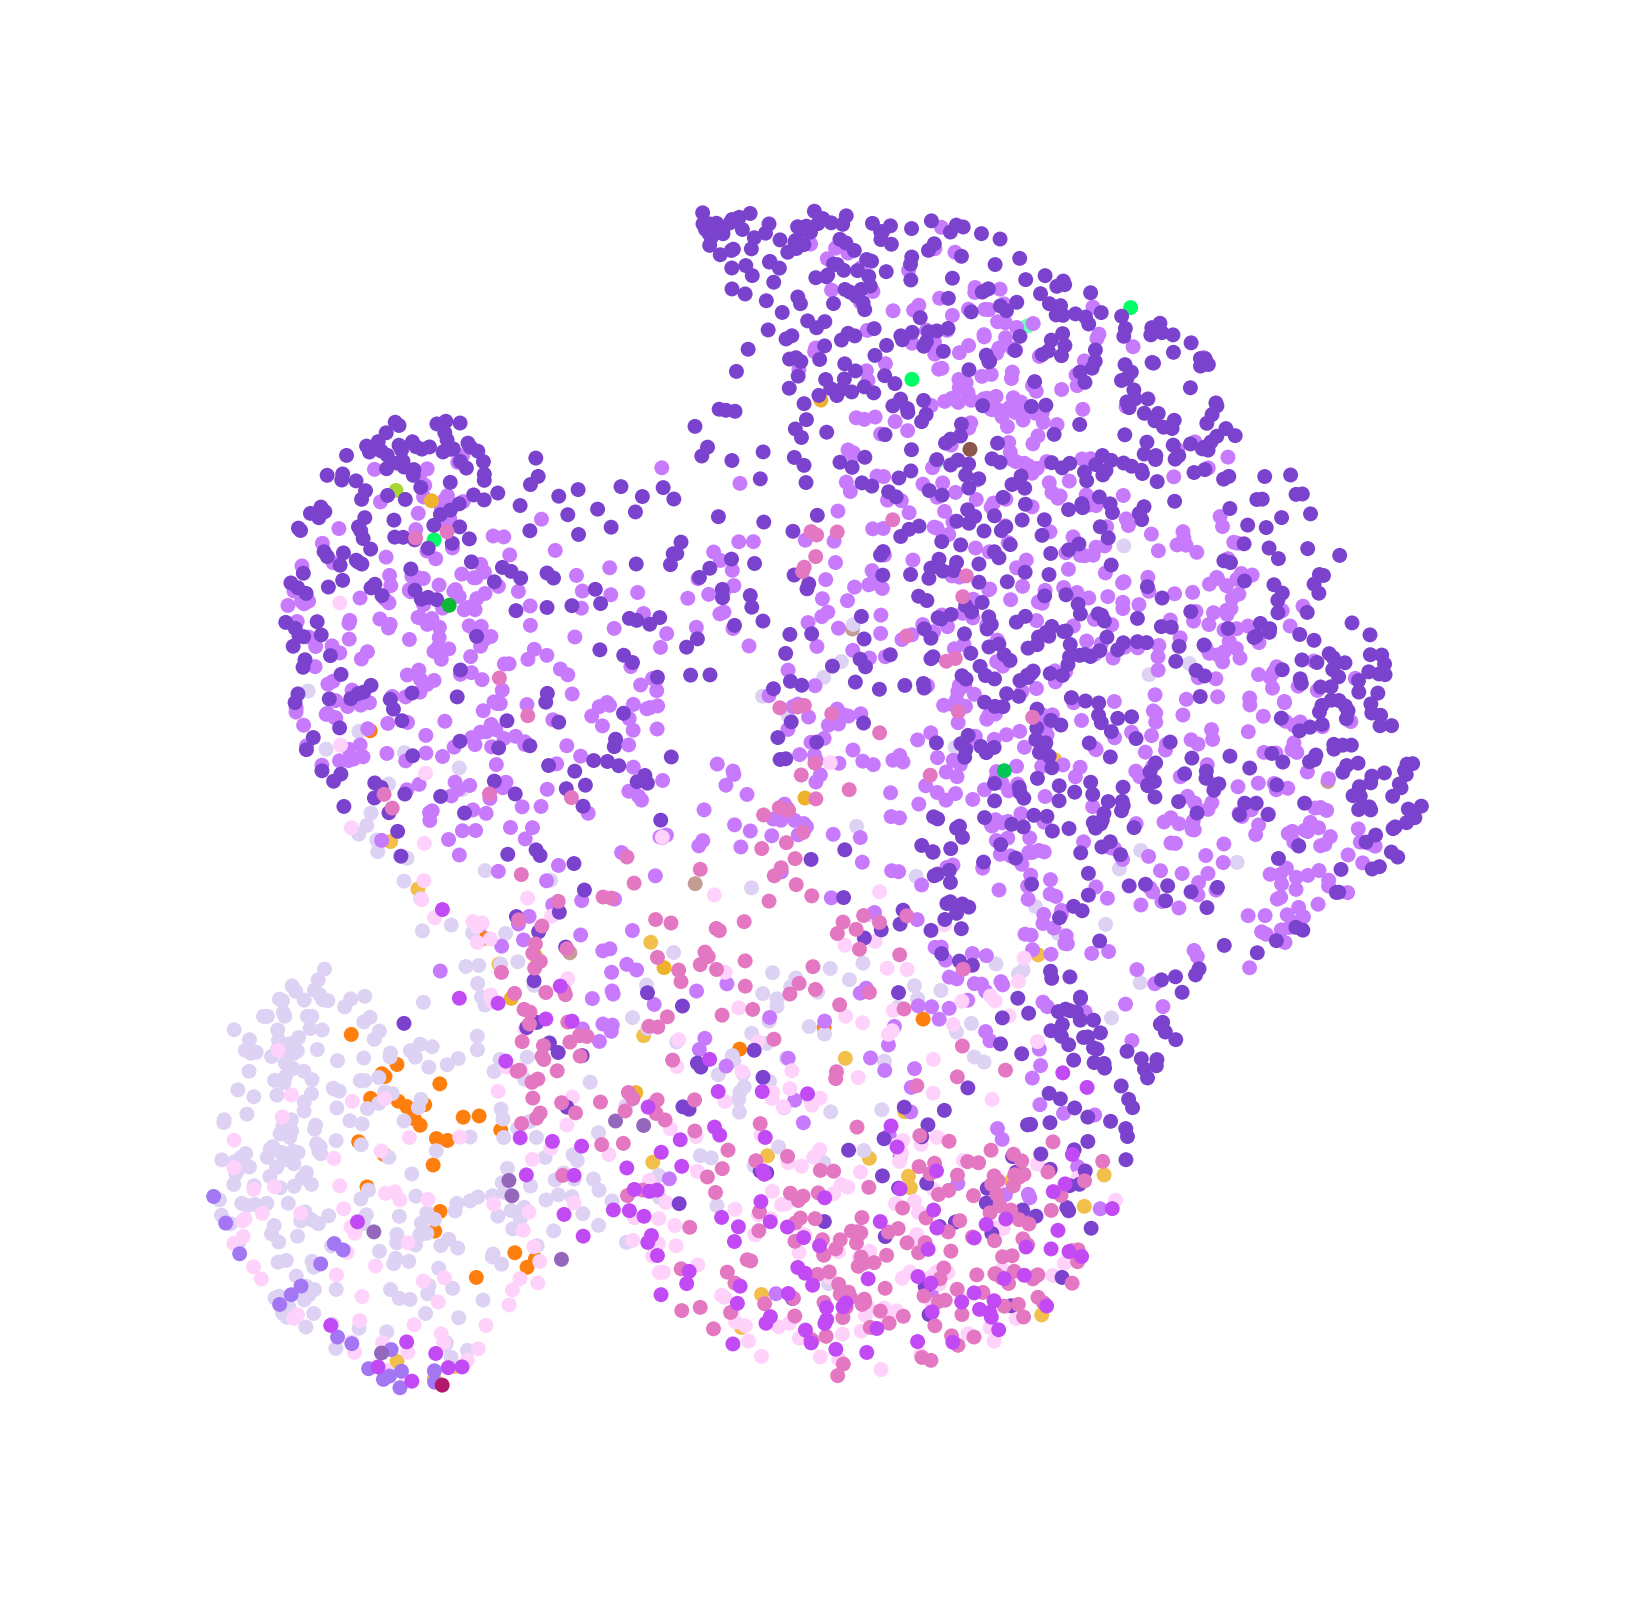

In [10]:
fig, ax = plt.subplots(figsize=(1.5, 1.5), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l3-umap',
                    hue='Region',
                    palette=region_palette,
                    s=0.8,
                    max_points=None,
                    text_anno=None, 
                    axis_format=None)
fig.savefig('files/L3-UMAP_color_by_region.scatter_part.png')
pass

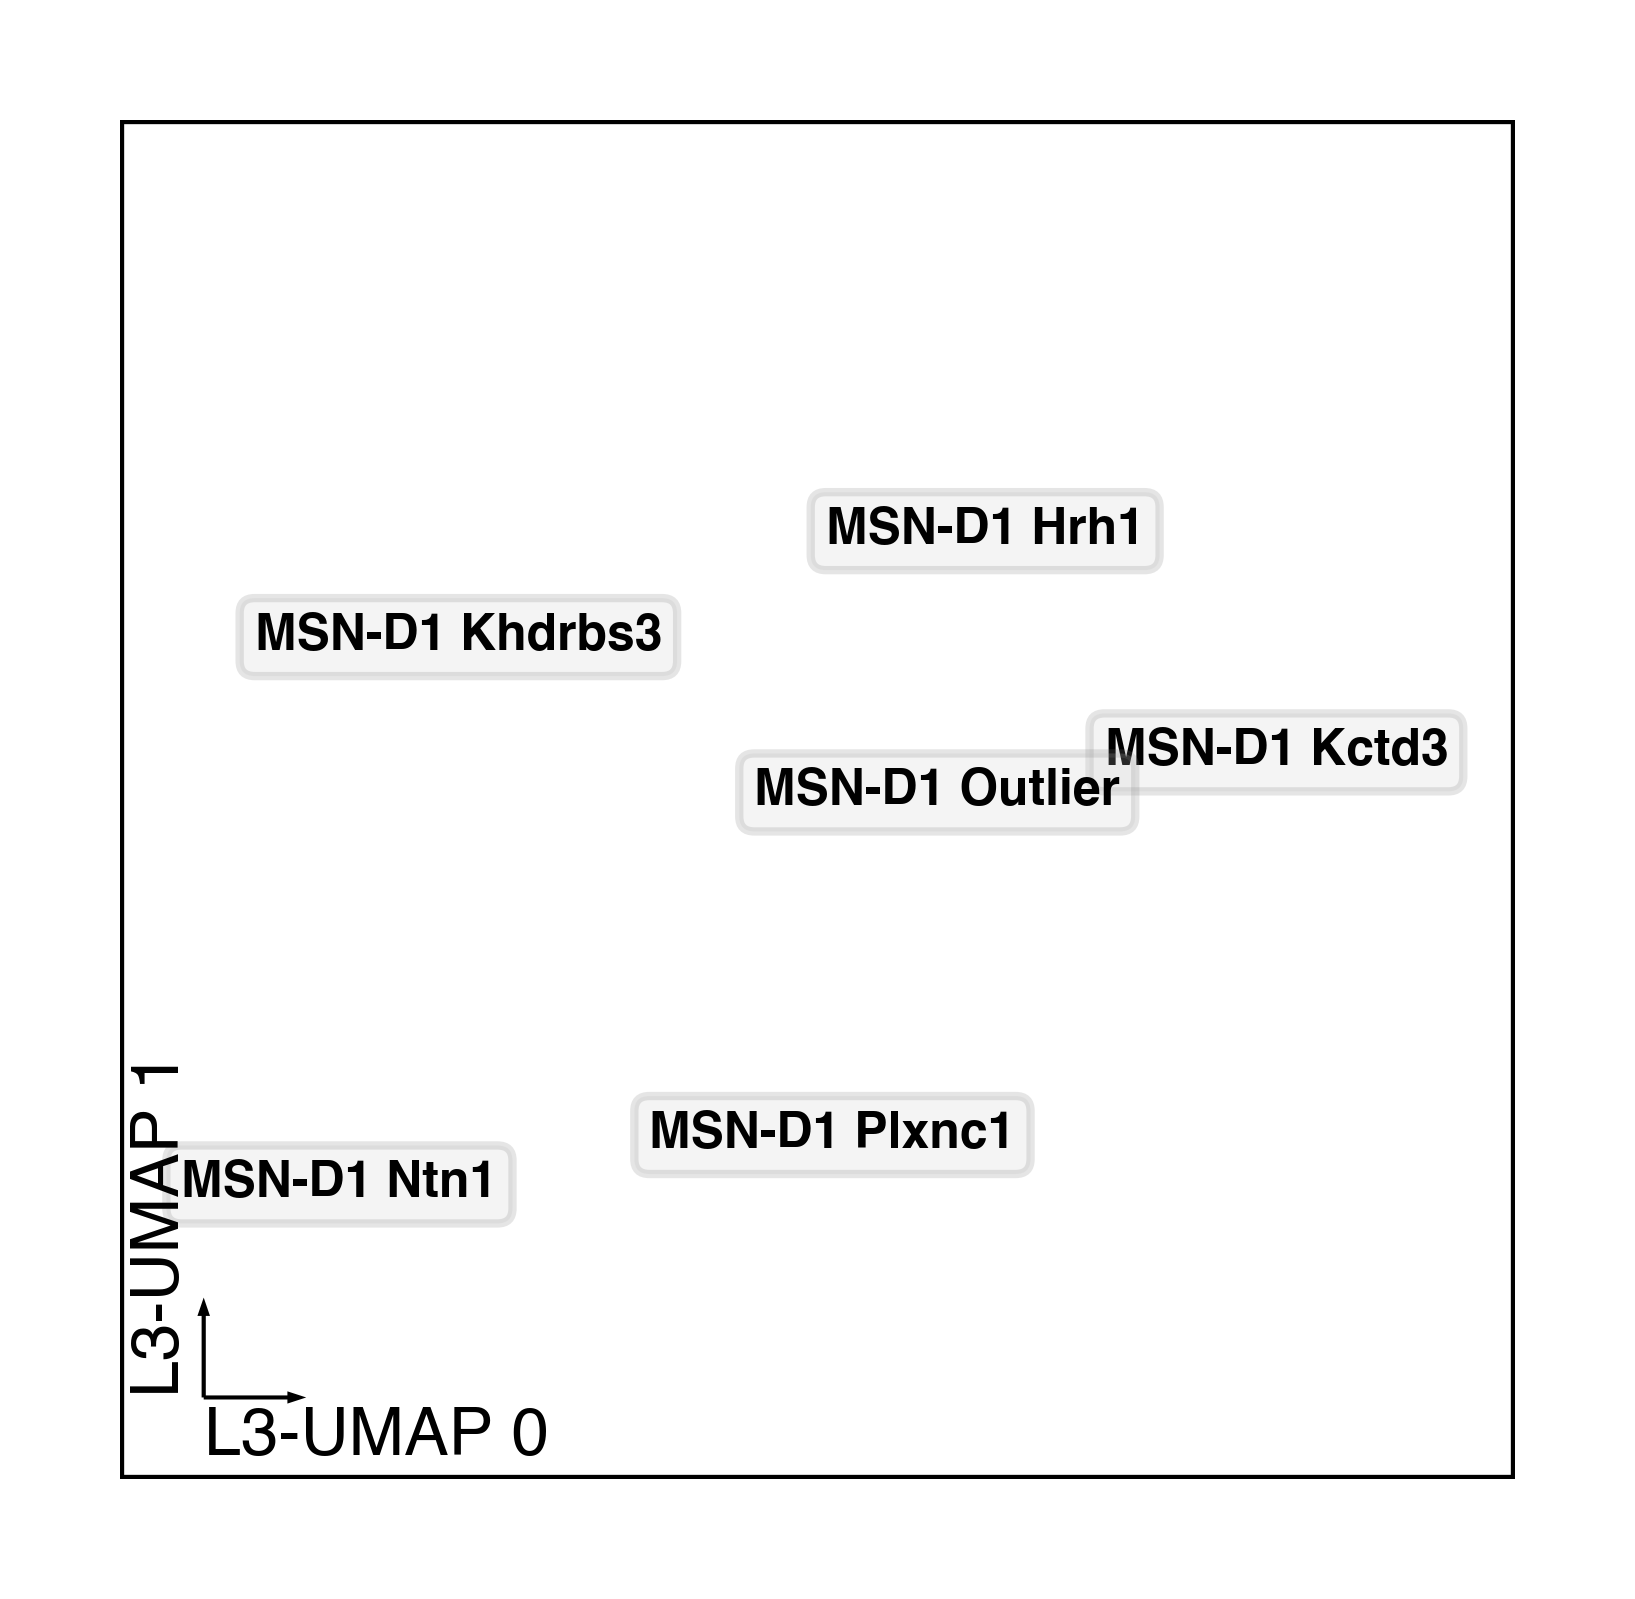

In [11]:
fig, ax = plt.subplots(figsize=(1.5, 1.5), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l3-umap',
                    hue='Region',
                    palette=region_palette,
                    s=0.1,
                    max_points=None,
                    text_anno='SubType',
                    text_anno_kws=dict(fontsize=3))

add_ax_box(ax, linewidth=0.5)

ax.collections[0].remove()

fig.savefig('files/L3-UMAP_color_by_region.label_part.pdf')
pass